In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [2]:
medhist = pd.read_csv('../data/Medical_History/MEDHIST_11Sep2023.csv')
hosp = pd.read_csv('../data/Medical_History/RECADV_11Sep2023.csv')
physical = pd.read_csv('../data/Medical_History/PHYSICAL_11Sep2023.csv')
vitals = pd.read_csv('../data/Medical_History/VITALS_11Sep2023.csv')
meds = pd.read_csv('../data/Medical_History/RECCMEDS_11Sep2023.csv')
neuro = pd.read_csv('../data/Medical_History/NEUROEXM_11Sep2023.csv')
diag = pd.read_csv('../data/Medical_History/DXSUM_PDXCONV_ADNIALL_15Sep2023.csv')
demo = pd.read_csv('../data/Subject_Characteristics/PTDEMOG_11Sep2023.csv')
famhist = pd.read_csv('../data/Subject_Characteristics/FHQ_11Sep2023.csv')
merge = pd.read_csv('../data/ADNIMERGE.csv')
challenge = pd.read_csv('../data/AD_Challenge_Training_Data_Clinical_Updated_7.22.2014/ADNI_Training_Q3_APOE_CollectionADNI1Complete 1Yr 1.5T_July22.2014.csv')

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_72752/630341187.py:2: DtypeWarning: Columns (11,34) have mixed types. Specify dtype option on import or set low_memory=False.
  hosp = pd.read_csv('../data/Medical_History/RECADV_11Sep2023.csv')
/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_72752/630341187.py:5: DtypeWarning: Columns (11,15,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  meds = pd.read_csv('../data/Medical_History/RECCMEDS_11Sep2023.csv')
/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_72752/630341187.py:10: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  merge = pd.read_csv('../data/ADNIMERGE.csv')


In [3]:
", ".join(list(set(merge['PTID'].values)))

'941_S_4764, 019_S_5019, 128_S_0715, 022_S_6069, 128_S_2036, 027_S_0461, 011_S_4893, 041_S_4014, 130_S_2391, 033_S_6697, 053_S_5272, 035_S_4785, 082_S_0469, 094_S_1398, 116_S_4855, 011_S_0168, 016_S_6943, 128_S_0266, 033_S_1116, 006_S_6234, 135_S_6104, 126_S_4896, 137_S_0438, 073_S_2190, 094_S_4560, 126_S_4712, 035_S_6551, 041_S_0314, 070_S_6542, 007_S_6120, 035_S_6999, 018_S_5240, 941_S_1295, 127_S_6024, 022_S_6796, 003_S_4872, 067_S_0336, 052_S_0671, 100_S_5075, 141_S_6416, 099_S_2042, 141_S_1231, 027_S_5197, 052_S_1352, 137_S_4520, 002_S_6456, 053_S_0919, 027_S_5127, 116_S_0392, 109_S_6405, 082_S_5184, 019_S_4252, 035_S_7123, 116_S_6750, 114_S_0416, 082_S_2099, 153_S_4125, 082_S_6629, 006_S_0498, 023_S_1126, 035_S_7019, 067_S_5160, 070_S_4793, 007_S_6323, 036_S_4562, 009_S_1199, 037_S_7011, 057_S_0474, 005_S_2390, 023_S_4034, 007_S_6455, 114_S_5047, 041_S_4720, 130_S_6043, 005_S_0222, 024_S_1171, 011_S_7048, 135_S_4309, 123_S_4170, 031_S_4590, 099_S_6396, 168_S_6591, 131_S_6616, 037

## Merged Table

In [4]:
merge.columns.to_list()

['RID',
 'COLPROT',
 'ORIGPROT',
 'PTID',
 'SITE',
 'VISCODE',
 'EXAMDATE',
 'DX_bl',
 'AGE',
 'PTGENDER',
 'PTEDUCAT',
 'PTETHCAT',
 'PTRACCAT',
 'PTMARRY',
 'APOE4',
 'FDG',
 'PIB',
 'AV45',
 'FBB',
 'ABETA',
 'TAU',
 'PTAU',
 'CDRSB',
 'ADAS11',
 'ADAS13',
 'ADASQ4',
 'MMSE',
 'RAVLT_immediate',
 'RAVLT_learning',
 'RAVLT_forgetting',
 'RAVLT_perc_forgetting',
 'LDELTOTAL',
 'DIGITSCOR',
 'TRABSCOR',
 'FAQ',
 'MOCA',
 'EcogPtMem',
 'EcogPtLang',
 'EcogPtVisspat',
 'EcogPtPlan',
 'EcogPtOrgan',
 'EcogPtDivatt',
 'EcogPtTotal',
 'EcogSPMem',
 'EcogSPLang',
 'EcogSPVisspat',
 'EcogSPPlan',
 'EcogSPOrgan',
 'EcogSPDivatt',
 'EcogSPTotal',
 'FLDSTRENG',
 'FSVERSION',
 'IMAGEUID',
 'Ventricles',
 'Hippocampus',
 'WholeBrain',
 'Entorhinal',
 'Fusiform',
 'MidTemp',
 'ICV',
 'DX',
 'mPACCdigit',
 'mPACCtrailsB',
 'EXAMDATE_bl',
 'CDRSB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'MMSE_bl',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',

In [5]:
data = merge[['PTID', 'RID', 'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'APOE4', 'MMSE', 'DX', 'EXAMDATE_bl']]
data.columns = ['PTID', 'RID', 'EXAMDATE', 'Diagnosis_at_Baseline', 'Age', 'Gender', 'Years_of_Education', 'Ethnicity', 'Race', 'APOE4', 'MMSE', 'DX', 'EXAMDATE_bl']
data['EXAMDATE'] = pd.to_datetime(data['EXAMDATE'])
data.head()

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_72752/4272877979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EXAMDATE'] = pd.to_datetime(data['EXAMDATE'])


,PTID,RID,EXAMDATE,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,DX,EXAMDATE_bl
0,011_S_0002,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,28.0,CN,2005-09-08
1,011_S_0003,3,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,20.0,Dementia,2005-09-12
2,011_S_0003,3,2006-03-13,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,24.0,Dementia,2005-09-12
3,011_S_0003,3,2006-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,17.0,Dementia,2005-09-12
4,011_S_0003,3,2007-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,19.0,Dementia,2005-09-12


### AD Diagnosis Dates

In [6]:
def ad_diagnosis(row):
    if row['DX'] == 'Dementia':
        row['DXAD'] = 1
    else:
        row['DXAD'] = 0
    
    return row

data = data.apply(ad_diagnosis, axis=1)
data.head()

,PTID,RID,EXAMDATE,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,DX,EXAMDATE_bl,DXAD
0,011_S_0002,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,28.0,CN,2005-09-08,0
1,011_S_0003,3,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,20.0,Dementia,2005-09-12,1
2,011_S_0003,3,2006-03-13,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,24.0,Dementia,2005-09-12,1
3,011_S_0003,3,2006-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,17.0,Dementia,2005-09-12,1
4,011_S_0003,3,2007-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,19.0,Dementia,2005-09-12,1


In [7]:
AD_dates = {}

for patient_id in set(data['PTID']):
    if max(data[data['PTID'] == patient_id]['DXAD']) != 1:
        AD_dates[patient_id] = float('nan')
    else:
        AD_dates[patient_id] = min(data[(data['PTID'] == patient_id) & (data['DXAD'] == 1)]['EXAMDATE'])

AD_dates_df = pd.DataFrame.from_dict(AD_dates, orient='index').reset_index()
AD_dates_df.columns = ['PTID','AD_diagnosis_date']
AD_dates_df

,PTID,AD_diagnosis_date
0,941_S_4764,NaT
1,019_S_5019,2012-11-16
2,128_S_0715,NaT
3,022_S_6069,NaT
4,128_S_2036,NaT
...,...,...
2425,041_S_4874,NaT
2426,027_S_4962,2012-10-15
2427,135_S_6687,2019-03-12
2428,032_S_6804,NaT


### Death Dates

In [8]:
hosp.columns.to_list()

['Phase',
 'ID',
 'RID',
 'PTID',
 'SITEID',
 'VISCODE',
 'VISCODE2',
 'VISDATE',
 'USERDATE',
 'USERDATE2',
 'RECNO',
 'EXAMDATE',
 'AENUMBER',
 'AEHEVNT',
 'AEHBLSYM',
 'AEHONSDT',
 'AEHONSHR',
 'AEHONGNG',
 'AEHCSDT',
 'AEHCSHR',
 'AEHCHRON',
 'AEHSEVR',
 'AEHSERIO',
 'AEHSAE',
 'AEHREPBY',
 'AEHREASN',
 'AEHLIFE',
 'AEHIMG',
 'AEHLUMB',
 'AEHAV45',
 'AEHCMEDS',
 'AEHINHOS',
 'AEHPRO',
 'AEHHOSP',
 'AEHOUTDT',
 'AEHADMDT',
 'AEHADDIA',
 'AEHDISDT',
 'AEHDISDI',
 'AEHDEATH',
 'AEHDTHDT',
 'AEHDCAUS',
 'AEHALZHI',
 'AEHCOMM',
 'update_stamp']

In [9]:
hosp['AEHDTHDT'] = pd.to_datetime(hosp['AEHDTHDT'], errors='coerce')
hosp['AEHDTHDT'].value_counts()

2012-02-29    2
2007-12-26    2
2014-06-17    2
2013-01-01    2
2009-06-03    2
             ..
2012-09-02    1
2012-10-20    1
2012-04-08    1
2011-11-13    1
2016-04-13    1
Name: AEHDTHDT, Length: 131, dtype: int64

In [10]:
death_dates = {}

for patient_id in set(hosp['PTID']):
    if len(hosp[(hosp['PTID'] == patient_id) & (~hosp['AEHDTHDT'].isnull())]['AEHDTHDT']) < 1:
        death_dates[patient_id] = float('nan')
    else:
        death_dates[patient_id] = min(hosp[(hosp['PTID'] == patient_id) & (~hosp['AEHDTHDT'].isnull())]['AEHDTHDT'])

death_dates_df = pd.DataFrame.from_dict(death_dates, orient='index').reset_index()
death_dates_df.columns = ['PTID','death_date']
death_dates_df

,PTID,death_date
0,941_S_4764,NaT
1,019_S_5019,NaT
2,128_S_0715,2013-03-10
3,128_S_2036,NaT
4,067_S_2265,NaT
...,...,...
1791,136_S_0107,NaT
1792,131_S_0457,NaT
1793,041_S_4874,NaT
1794,027_S_4962,NaT


In [11]:
death_dates_df['death_date'].value_counts()

2013-01-01    2
2018-03-10    2
2014-06-17    2
2013-03-10    1
2011-03-15    1
             ..
2013-02-13    1
2012-04-08    1
2013-06-11    1
2016-06-03    1
2016-11-21    1
Name: death_date, Length: 131, dtype: int64

In [12]:
df_labels = AD_dates_df.merge(death_dates_df, on='PTID')
df_labels

,PTID,AD_diagnosis_date,death_date
0,941_S_4764,NaT,NaT
1,019_S_5019,2012-11-16,NaT
2,128_S_0715,NaT,2013-03-10
3,128_S_2036,NaT,NaT
4,027_S_0461,2007-12-17,NaT
...,...,...,...
1731,136_S_0107,NaT,NaT
1732,131_S_0457,2006-05-16,NaT
1733,041_S_4874,NaT,NaT
1734,027_S_4962,2012-10-15,NaT


In [13]:
df_labels.to_csv('../data/AD_diagnosis_and_death_dates.csv', index=False)

### Merge labels with data

In [14]:
grouped_data = data[data['EXAMDATE'] == data['EXAMDATE_bl']]
grouped_data = grouped_data[['PTID', 'RID', 'EXAMDATE', 'Diagnosis_at_Baseline', 'Age', 'Gender',
       'Years_of_Education', 'Ethnicity', 'Race', 'APOE4', 'MMSE']]
grouped_data.head()

,PTID,RID,EXAMDATE,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE
0,011_S_0002,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,28.0
1,011_S_0003,3,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,20.0
5,022_S_0004,4,2005-11-08,LMCI,67.5,Male,10,Hisp/Latino,White,0.0,27.0
10,011_S_0005,5,2005-09-07,CN,73.7,Male,16,Not Hisp/Latino,White,0.0,29.0
15,100_S_0006,6,2005-11-29,LMCI,80.4,Female,13,Not Hisp/Latino,White,0.0,25.0


In [15]:
final = grouped_data.merge(df_labels, on='PTID')
final.head(20)

,PTID,RID,EXAMDATE,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,AD_diagnosis_date,death_date
0,011_S_0002,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,28.0,NaT,NaT
1,011_S_0003,3,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,20.0,2005-09-12,NaT
2,022_S_0004,4,2005-11-08,LMCI,67.5,Male,10,Hisp/Latino,White,0.0,27.0,NaT,NaT
3,011_S_0005,5,2005-09-07,CN,73.7,Male,16,Not Hisp/Latino,White,0.0,29.0,NaT,NaT
4,100_S_0006,6,2005-11-29,LMCI,80.4,Female,13,Not Hisp/Latino,White,0.0,25.0,NaT,NaT
5,022_S_0007,7,2005-10-06,AD,75.4,Male,10,Hisp/Latino,More than one,1.0,20.0,2005-10-06,NaT
6,011_S_0010,10,2005-11-10,AD,73.9,Female,12,Not Hisp/Latino,White,1.0,24.0,2005-11-10,NaT
7,022_S_0014,14,2005-11-04,CN,78.5,Female,12,Hisp/Latino,White,0.0,29.0,NaT,NaT
8,100_S_0015,15,2005-10-18,CN,80.8,Male,18,Not Hisp/Latino,White,1.0,29.0,NaT,2013-04-22
9,011_S_0016,16,2005-10-13,CN,65.4,Male,9,Not Hisp/Latino,Black,1.0,28.0,NaT,NaT


In [16]:
final.dtypes

PTID                             object
RID                               int64
EXAMDATE                 datetime64[ns]
Diagnosis_at_Baseline            object
Age                             float64
Gender                           object
Years_of_Education                int64
Ethnicity                        object
Race                             object
APOE4                           float64
MMSE                            float64
AD_diagnosis_date        datetime64[ns]
death_date               datetime64[ns]
dtype: object

### Create binary labels

In [17]:
final['time_to_dx'] = final['AD_diagnosis_date'] - final['EXAMDATE']
final.head()

,PTID,RID,EXAMDATE,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,AD_diagnosis_date,death_date,time_to_dx
0,011_S_0002,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,28.0,NaT,NaT,NaT
1,011_S_0003,3,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,20.0,2005-09-12,NaT,0 days
2,022_S_0004,4,2005-11-08,LMCI,67.5,Male,10,Hisp/Latino,White,0.0,27.0,NaT,NaT,NaT
3,011_S_0005,5,2005-09-07,CN,73.7,Male,16,Not Hisp/Latino,White,0.0,29.0,NaT,NaT,NaT
4,100_S_0006,6,2005-11-29,LMCI,80.4,Female,13,Not Hisp/Latino,White,0.0,25.0,NaT,NaT,NaT


In [18]:
final['time_to_AD_dx_days'] = final['time_to_dx'].dt.days
final.head()

,PTID,RID,EXAMDATE,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,AD_diagnosis_date,death_date,time_to_dx,time_to_AD_dx_days
0,011_S_0002,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,28.0,NaT,NaT,NaT,NaN
1,011_S_0003,3,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,20.0,2005-09-12,NaT,0 days,0.0
2,022_S_0004,4,2005-11-08,LMCI,67.5,Male,10,Hisp/Latino,White,0.0,27.0,NaT,NaT,NaT,NaN
3,011_S_0005,5,2005-09-07,CN,73.7,Male,16,Not Hisp/Latino,White,0.0,29.0,NaT,NaT,NaT,NaN
4,100_S_0006,6,2005-11-29,LMCI,80.4,Female,13,Not Hisp/Latino,White,0.0,25.0,NaT,NaT,NaT,NaN


In [19]:
final = final[final['Diagnosis_at_Baseline'] != 'AD']
len(final)

1398

In [20]:
max(final['time_to_AD_dx_days'].dropna())/365

13.06027397260274

In [21]:
final['AD_dx_in_any_time'] = (~final['time_to_AD_dx_days'].isnull())
final['AD_dx_in_any_time'] = final['AD_dx_in_any_time'].astype(int)

final['AD_dx_in_15_yrs'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 5475)
final['AD_dx_in_15_yrs'] = final['AD_dx_in_15_yrs'].astype(int)

final['AD_dx_in_10_yrs'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 3650)
final['AD_dx_in_10_yrs'] = final['AD_dx_in_10_yrs'].astype(int)

final['AD_dx_in_5_yrs'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 1825)
final['AD_dx_in_5_yrs'] = final['AD_dx_in_5_yrs'].astype(int)

final['AD_dx_in_4_yrs'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 1460)
final['AD_dx_in_4_yrs'] = final['AD_dx_in_4_yrs'].astype(int)

final['AD_dx_in_3_yrs'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 1095)
final['AD_dx_in_3_yrs'] = final['AD_dx_in_3_yrs'].astype(int)

final['AD_dx_in_2_yrs'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 730)
final['AD_dx_in_2_yrs'] = final['AD_dx_in_2_yrs'].astype(int)

final['AD_dx_in_1_yr'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 365)
final['AD_dx_in_1_yr'] = final['AD_dx_in_1_yr'].astype(int)

final.head()

,PTID,RID,EXAMDATE,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,...,time_to_dx,time_to_AD_dx_days,AD_dx_in_any_time,AD_dx_in_15_yrs,AD_dx_in_10_yrs,AD_dx_in_5_yrs,AD_dx_in_4_yrs,AD_dx_in_3_yrs,AD_dx_in_2_yrs,AD_dx_in_1_yr
0,011_S_0002,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,...,NaT,NaN,0,0,0,0,0,0,0,0
2,022_S_0004,4,2005-11-08,LMCI,67.5,Male,10,Hisp/Latino,White,0.0,...,NaT,NaN,0,0,0,0,0,0,0,0
3,011_S_0005,5,2005-09-07,CN,73.7,Male,16,Not Hisp/Latino,White,0.0,...,NaT,NaN,0,0,0,0,0,0,0,0
4,100_S_0006,6,2005-11-29,LMCI,80.4,Female,13,Not Hisp/Latino,White,0.0,...,NaT,NaN,0,0,0,0,0,0,0,0
7,022_S_0014,14,2005-11-04,CN,78.5,Female,12,Hisp/Latino,White,0.0,...,NaT,NaN,0,0,0,0,0,0,0,0


In [22]:
final['AD_dx_in_1_yr'].value_counts()/len(final)*100

0    94.134478
1     5.865522
Name: AD_dx_in_1_yr, dtype: float64

In [23]:
final['AD_dx_in_15_yrs'].value_counts()/len(final)*100

0    71.816881
1    28.183119
Name: AD_dx_in_15_yrs, dtype: float64

In [24]:
final.columns

Index(['PTID', 'RID', 'EXAMDATE', 'Diagnosis_at_Baseline', 'Age', 'Gender',
       'Years_of_Education', 'Ethnicity', 'Race', 'APOE4', 'MMSE',
       'AD_diagnosis_date', 'death_date', 'time_to_dx', 'time_to_AD_dx_days',
       'AD_dx_in_any_time', 'AD_dx_in_15_yrs', 'AD_dx_in_10_yrs',
       'AD_dx_in_5_yrs', 'AD_dx_in_4_yrs', 'AD_dx_in_3_yrs', 'AD_dx_in_2_yrs',
       'AD_dx_in_1_yr'],
      dtype='object')

In [25]:
df_outcomes = final[['PTID', 'EXAMDATE', 'time_to_AD_dx_days', 'AD_dx_in_any_time', 'AD_dx_in_15_yrs', 'AD_dx_in_10_yrs',
       'AD_dx_in_5_yrs', 'AD_dx_in_4_yrs', 'AD_dx_in_3_yrs', 'AD_dx_in_2_yrs',
       'AD_dx_in_1_yr']]
df_outcomes.head()

,PTID,EXAMDATE,time_to_AD_dx_days,AD_dx_in_any_time,AD_dx_in_15_yrs,AD_dx_in_10_yrs,AD_dx_in_5_yrs,AD_dx_in_4_yrs,AD_dx_in_3_yrs,AD_dx_in_2_yrs,AD_dx_in_1_yr
0,011_S_0002,2005-09-08,NaN,0,0,0,0,0,0,0,0
2,022_S_0004,2005-11-08,NaN,0,0,0,0,0,0,0,0
3,011_S_0005,2005-09-07,NaN,0,0,0,0,0,0,0,0
4,100_S_0006,2005-11-29,NaN,0,0,0,0,0,0,0,0
7,022_S_0014,2005-11-04,NaN,0,0,0,0,0,0,0,0


In [26]:
df_outcomes.to_csv('../data/AD_time_to_dx.csv', index=False)

In [27]:
final.columns

Index(['PTID', 'RID', 'EXAMDATE', 'Diagnosis_at_Baseline', 'Age', 'Gender',
       'Years_of_Education', 'Ethnicity', 'Race', 'APOE4', 'MMSE',
       'AD_diagnosis_date', 'death_date', 'time_to_dx', 'time_to_AD_dx_days',
       'AD_dx_in_any_time', 'AD_dx_in_15_yrs', 'AD_dx_in_10_yrs',
       'AD_dx_in_5_yrs', 'AD_dx_in_4_yrs', 'AD_dx_in_3_yrs', 'AD_dx_in_2_yrs',
       'AD_dx_in_1_yr'],
      dtype='object')

In [28]:
training_data_1 = final[['PTID', 'Diagnosis_at_Baseline', 'Age', 'Gender',
                       'Years_of_Education', 'Ethnicity', 'Race', 'APOE4', 'MMSE',
                       'AD_dx_in_any_time', 'AD_dx_in_15_yrs', 'AD_dx_in_10_yrs',
                       'AD_dx_in_5_yrs', 'AD_dx_in_4_yrs', 'AD_dx_in_3_yrs', 'AD_dx_in_2_yrs',
                       'AD_dx_in_1_yr']]
training_data_1.to_csv('../data/clinical_training_data.csv', index=False)

In [29]:
print(len(training_data_1))
print(training_data_1['PTID'].nunique())

1398
1398


## Medical History

In [30]:
medhist.columns

Index(['Phase', 'ID', 'PTID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2',
       'VISDATE', 'USERDATE', 'USERDATE2', 'EXAMDATE', 'MHSOURCE', 'MHPSYCH',
       'MH2NEURL', 'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH6HEPAT', 'MH7DERM',
       'MH8MUSCL', 'MH9ENDO', 'MH10GAST', 'MH11HEMA', 'MH12RENA', 'MH13ALLE',
       'MH14ALCH', 'MH14AALCH', 'MH14BALCH', 'MH14CALCH', 'MH15DRUG',
       'MH15ADRUG', 'MH15BDRUG', 'MH16SMOK', 'MH16ASMOK', 'MH16BSMOK',
       'MH16CSMOK', 'MH17MALI', 'MH18SURG', 'MH19OTHR', 'MHCOMMEN',
       'update_stamp'],
      dtype='object')

In [31]:
final.columns

Index(['PTID', 'RID', 'EXAMDATE', 'Diagnosis_at_Baseline', 'Age', 'Gender',
       'Years_of_Education', 'Ethnicity', 'Race', 'APOE4', 'MMSE',
       'AD_diagnosis_date', 'death_date', 'time_to_dx', 'time_to_AD_dx_days',
       'AD_dx_in_any_time', 'AD_dx_in_15_yrs', 'AD_dx_in_10_yrs',
       'AD_dx_in_5_yrs', 'AD_dx_in_4_yrs', 'AD_dx_in_3_yrs', 'AD_dx_in_2_yrs',
       'AD_dx_in_1_yr'],
      dtype='object')

In [32]:
medhist['EXAMDATE'] = pd.to_datetime(medhist['EXAMDATE'])
medhist.head()

,Phase,ID,PTID,RID,SITEID,VISCODE,VISCODE2,VISDATE,USERDATE,USERDATE2,...,MH15BDRUG,MH16SMOK,MH16ASMOK,MH16BSMOK,MH16CSMOK,MH17MALI,MH18SURG,MH19OTHR,MHCOMMEN,update_stamp
0,ADNI1,8,011_S_0002,2,107,sc,sc,2005-08-17,2005-08-17,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,-4,2005-08-17 00:00:00.0
1,ADNI1,10,022_S_0001,1,10,f,f,2005-08-18,2005-08-18,NaN,...,NaN,0,NaN,NaN,NaN,0,0,1,-4,2005-08-18 00:00:00.0
2,ADNI1,12,011_S_0003,3,107,sc,sc,2005-08-18,2005-08-18,NaN,...,NaN,1,NaN,NaN,NaN,1,1,0,-4,2005-08-18 00:00:00.0
3,ADNI1,14,022_S_0004,4,10,sc,sc,2005-08-18,2005-08-18,NaN,...,NaN,1,NaN,NaN,NaN,0,1,0,-4,2005-08-18 00:00:00.0
4,ADNI1,16,011_S_0005,5,107,sc,sc,2005-08-23,2005-08-23,NaN,...,NaN,1,NaN,NaN,NaN,0,1,0,-4,2005-08-23 00:00:00.0


In [33]:
medhist = medhist[["PTID", "EXAMDATE", "MHPSYCH", "MH2NEURL", "MH3HEAD", "MH4CARD", "MH5RESP", "MH6HEPAT", "MH7DERM", "MH8MUSCL", "MH9ENDO", "MH10GAST", "MH11HEMA", "MH12RENA", "MH13ALLE", "MH14ALCH", "MH15DRUG", "MH16SMOK", "MH17MALI", "MH18SURG"]]
medhist.columns = ["PTID", "EXAMDATE", 
                     'Medical_History_of_Psychiatric_Issues',
                     'Medical_History_of_Neurological_Issues',
                     'Medical_History_of_Head_Eyes_Ears_Nose_and_Throat_Issues',
                     'Medical_History_of_Cardiovascular_Issues',
                     'Medical_History_of_Respiratory_Issues',
                     'Medical_History_of_Hepatic_Issues',
                     'Medical_History_of_Dermatologic_Connective_Tissue_Issues',
                     'Medical_History_of_Musculoskeletal_Issues',
                     'Medical_History_of_Endocrine_Metabolic_Issues',
                     'Medical_History_of_Gastrointestinal_Issues',
                     'Medical_History_of_Hematopoietic_Lymphatic_Issues',
                     'Medical_History_of_Renal_Genitourinary_Issues',
                     'Medical_History_of_Allergies_Drug_Sensitivities',
                     'Medical_History_of_Alcohol_Abuse',
                     'Medical_History_of_Drug_Abuse',
                     'Medical_History_of_Smoking',
                     'Medical_History_of_Malignancy',
                     'Medical_History_of_Surgery']

### Merge data with medhist

In [34]:
final_medhist = final.merge(medhist, on=['PTID'], suffixes=('_final', '_medhist'))
final_medhist = final_medhist[final_medhist['EXAMDATE_medhist'] <= final_medhist['EXAMDATE_final']]
final_medhist.columns.to_list()

['PTID',
 'RID',
 'EXAMDATE_final',
 'Diagnosis_at_Baseline',
 'Age',
 'Gender',
 'Years_of_Education',
 'Ethnicity',
 'Race',
 'APOE4',
 'MMSE',
 'AD_diagnosis_date',
 'death_date',
 'time_to_dx',
 'time_to_AD_dx_days',
 'AD_dx_in_any_time',
 'AD_dx_in_15_yrs',
 'AD_dx_in_10_yrs',
 'AD_dx_in_5_yrs',
 'AD_dx_in_4_yrs',
 'AD_dx_in_3_yrs',
 'AD_dx_in_2_yrs',
 'AD_dx_in_1_yr',
 'EXAMDATE_medhist',
 'Medical_History_of_Psychiatric_Issues',
 'Medical_History_of_Neurological_Issues',
 'Medical_History_of_Head_Eyes_Ears_Nose_and_Throat_Issues',
 'Medical_History_of_Cardiovascular_Issues',
 'Medical_History_of_Respiratory_Issues',
 'Medical_History_of_Hepatic_Issues',
 'Medical_History_of_Dermatologic_Connective_Tissue_Issues',
 'Medical_History_of_Musculoskeletal_Issues',
 'Medical_History_of_Endocrine_Metabolic_Issues',
 'Medical_History_of_Gastrointestinal_Issues',
 'Medical_History_of_Hematopoietic_Lymphatic_Issues',
 'Medical_History_of_Renal_Genitourinary_Issues',
 'Medical_History_of_Al

In [35]:
final_medhist = final_medhist[['PTID',
                               'EXAMDATE_final',
                                 'Diagnosis_at_Baseline',
                                 'Age',
                                 'Gender',
                                 'Years_of_Education',
                                 'Ethnicity',
                                 'Race',
                                 'APOE4',
                                 'MMSE',
                                 'Medical_History_of_Psychiatric_Issues',
                                 'Medical_History_of_Neurological_Issues',
                                 'Medical_History_of_Head_Eyes_Ears_Nose_and_Throat_Issues',
                                 'Medical_History_of_Cardiovascular_Issues',
                                 'Medical_History_of_Respiratory_Issues',
                                 'Medical_History_of_Hepatic_Issues',
                                 'Medical_History_of_Dermatologic_Connective_Tissue_Issues',
                                 'Medical_History_of_Musculoskeletal_Issues',
                                 'Medical_History_of_Endocrine_Metabolic_Issues',
                                 'Medical_History_of_Gastrointestinal_Issues',
                                 'Medical_History_of_Hematopoietic_Lymphatic_Issues',
                                 'Medical_History_of_Renal_Genitourinary_Issues',
                                 'Medical_History_of_Allergies_Drug_Sensitivities',
                                 'Medical_History_of_Alcohol_Abuse',
                                 'Medical_History_of_Drug_Abuse',
                                 'Medical_History_of_Smoking',
                                 'Medical_History_of_Malignancy',
                                 'Medical_History_of_Surgery',
                                 'AD_dx_in_any_time',
                                 'AD_dx_in_15_yrs',
                                 'AD_dx_in_10_yrs',
                                 'AD_dx_in_5_yrs',
                                 'AD_dx_in_4_yrs',
                                 'AD_dx_in_3_yrs',
                                 'AD_dx_in_2_yrs',
                                 'AD_dx_in_1_yr']]

In [36]:
final_medhist.drop(columns=['EXAMDATE_final']).to_csv('../data/clinical_training_data_with_medhist.csv', index=False)

In [37]:
print(len(final_medhist))
print(final_medhist['PTID'].nunique())

629
629


## Family History

In [38]:
famhist.head()

,PHASE,ID,PTID,RID,SITEID,VISCODE,VISDATE,USERDATE,USERDATE2,FHQSOURCE,FHQPROV,FHQMOM,FHQMOMAD,FHQDAD,FHQDADAD,FHQSIB,update_stamp
0,ADNI1,12,011_S_0002,2,107,sc,2005-08-17,2005-08-17,NaN,1.0,2,0.0,0.0,0.0,0.0,0,2005-08-17 00:00:00.0
1,ADNI1,14,022_S_0001,1,10,f,2005-08-18,2005-08-18,NaN,1.0,2,0.0,-4.0,0.0,-4.0,1,2005-08-18 00:00:00.0
2,ADNI1,16,011_S_0003,3,107,sc,2005-08-18,2005-08-18,NaN,1.0,3,0.0,0.0,1.0,1.0,0,2005-08-18 00:00:00.0
3,ADNI1,18,022_S_0004,4,10,sc,2005-08-18,2005-08-18,NaN,1.0,3,0.0,0.0,0.0,0.0,1,2005-08-18 00:00:00.0
4,ADNI1,20,011_S_0005,5,107,sc,2005-08-23,2005-08-23,NaN,1.0,2,0.0,0.0,1.0,0.0,1,2005-08-23 00:00:00.0


In [39]:
famhist = famhist.replace(-4.0, np.nan)
famhist = famhist.replace(-1.0, np.nan)
famhist = famhist.replace(2.0, np.nan)
famhist

,PHASE,ID,PTID,RID,SITEID,VISCODE,VISDATE,USERDATE,USERDATE2,FHQSOURCE,FHQPROV,FHQMOM,FHQMOMAD,FHQDAD,FHQDADAD,FHQSIB,update_stamp
0,ADNI1,12,011_S_0002,NaN,107.0,sc,2005-08-17,2005-08-17,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0,2005-08-17 00:00:00.0
1,ADNI1,14,022_S_0001,1.0,10.0,f,2005-08-18,2005-08-18,NaN,1.0,NaN,0.0,NaN,0.0,NaN,1,2005-08-18 00:00:00.0
2,ADNI1,16,011_S_0003,3.0,107.0,sc,2005-08-18,2005-08-18,NaN,1.0,3.0,0.0,0.0,1.0,1.0,0,2005-08-18 00:00:00.0
3,ADNI1,18,022_S_0004,4.0,10.0,sc,2005-08-18,2005-08-18,NaN,1.0,3.0,0.0,0.0,0.0,0.0,1,2005-08-18 00:00:00.0
4,ADNI1,20,011_S_0005,5.0,107.0,sc,2005-08-23,2005-08-23,NaN,1.0,NaN,0.0,0.0,1.0,0.0,1,2005-08-23 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,ADNI2,2878,051_S_5294,5294.0,28.0,v01,2013-10-01,2013-10-13,NaN,NaN,1.0,0.0,NaN,0.0,NaN,0,2013-10-13 19:17:14.0
2948,ADNI2,2880,057_S_5295,5295.0,31.0,v01,2013-11-14,2013-11-14,NaN,NaN,3.0,NaN,NaN,0.0,NaN,1,2013-11-15 19:17:18.0
2949,ADNI2,2882,053_S_5296,5296.0,30.0,v01,2013-11-29,2013-12-04,NaN,NaN,1.0,0.0,NaN,0.0,NaN,1,2013-12-04 19:17:19.0
2950,ADNI2,2884,100_S_5122,5122.0,40.0,v01,2013-03-29,2014-01-24,NaN,NaN,3.0,1.0,1.0,1.0,0.0,1,2014-01-25 19:17:22.0


In [40]:
famhist['VISDATE'] = pd.to_datetime(famhist['VISDATE'])

In [41]:
famhist['Family_History_of_Dementia'] = famhist['FHQMOM'] + famhist['FHQDAD']
famhist['Family_History_of_Dementia'].value_counts()

0.0    1390
1.0    1225
2.0     159
Name: Family_History_of_Dementia, dtype: int64

In [42]:
famhist['Family_History_of_AD'] = famhist['FHQMOMAD'] + famhist['FHQDADAD']
famhist['Family_History_of_AD'].value_counts()

0.0    644
1.0    237
2.0     53
Name: Family_History_of_AD, dtype: int64

In [43]:
famhist = famhist[['PTID', 'VISDATE', 'Family_History_of_Dementia', 'Family_History_of_AD']]

### Merge data with famhist

In [44]:
final_medhist_famhist = final_medhist.merge(famhist, on='PTID', suffixes=('_final', '_famhist'))
final_medhist_famhist = final_medhist_famhist[final_medhist_famhist['VISDATE'] <= final_medhist_famhist['EXAMDATE_final']]
final_medhist_famhist = final_medhist_famhist[['PTID', 'Diagnosis_at_Baseline', 'Age', 'Gender',
       'Years_of_Education', 'Ethnicity', 'Race', 'APOE4', 'MMSE',
       'Medical_History_of_Psychiatric_Issues',
       'Medical_History_of_Neurological_Issues',
       'Medical_History_of_Head_Eyes_Ears_Nose_and_Throat_Issues',
       'Medical_History_of_Cardiovascular_Issues',
       'Medical_History_of_Respiratory_Issues',
       'Medical_History_of_Hepatic_Issues',
       'Medical_History_of_Dermatologic_Connective_Tissue_Issues',
       'Medical_History_of_Musculoskeletal_Issues',
       'Medical_History_of_Endocrine_Metabolic_Issues',
       'Medical_History_of_Gastrointestinal_Issues',
       'Medical_History_of_Hematopoietic_Lymphatic_Issues',
       'Medical_History_of_Renal_Genitourinary_Issues',
       'Medical_History_of_Allergies_Drug_Sensitivities',
       'Medical_History_of_Alcohol_Abuse', 'Medical_History_of_Drug_Abuse',
       'Medical_History_of_Smoking', 'Medical_History_of_Malignancy',
       'Medical_History_of_Surgery', 'Family_History_of_Dementia', 'Family_History_of_AD',
       'AD_dx_in_any_time', 'AD_dx_in_15_yrs',
       'AD_dx_in_10_yrs', 'AD_dx_in_5_yrs', 'AD_dx_in_4_yrs', 'AD_dx_in_3_yrs',
       'AD_dx_in_2_yrs', 'AD_dx_in_1_yr']]
final_medhist_famhist.head()

,PTID,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,Medical_History_of_Psychiatric_Issues,...,Family_History_of_Dementia,Family_History_of_AD,AD_dx_in_any_time,AD_dx_in_15_yrs,AD_dx_in_10_yrs,AD_dx_in_5_yrs,AD_dx_in_4_yrs,AD_dx_in_3_yrs,AD_dx_in_2_yrs,AD_dx_in_1_yr
0,011_S_0002,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,28.0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,022_S_0004,LMCI,67.5,Male,10,Hisp/Latino,White,0.0,27.0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,011_S_0005,CN,73.7,Male,16,Not Hisp/Latino,White,0.0,29.0,0,...,1.0,0.0,0,0,0,0,0,0,0,0
4,100_S_0006,LMCI,80.4,Female,13,Not Hisp/Latino,White,0.0,25.0,0,...,1.0,0.0,0,0,0,0,0,0,0,0
5,022_S_0014,CN,78.5,Female,12,Hisp/Latino,White,0.0,29.0,1,...,0.0,0.0,0,0,0,0,0,0,0,0


In [45]:
print(len(final_medhist_famhist))
print(final_medhist_famhist['PTID'].nunique())

629
629


In [46]:
final_medhist_famhist.to_csv('../data/clinical_training_data_with_medhist_famhist.csv', index=False)

## Demographic Analytics

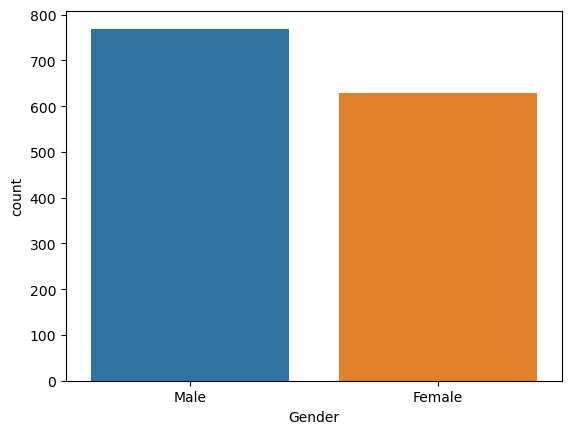

In [51]:
sns.countplot(data=final, x="Gender", order=['Male', 'Female'], hue="Gender")
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Count'>

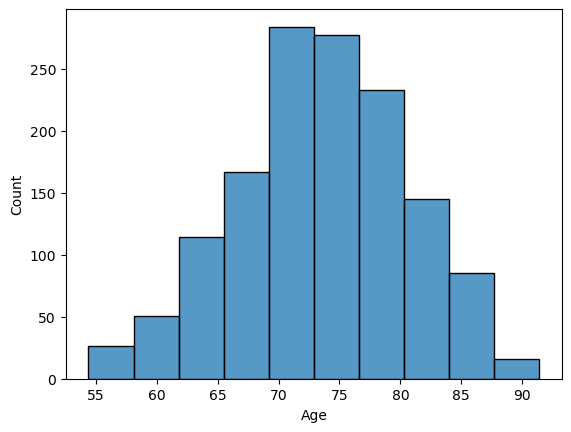

In [48]:
sns.histplot(data=final, x="Age", bins=10)

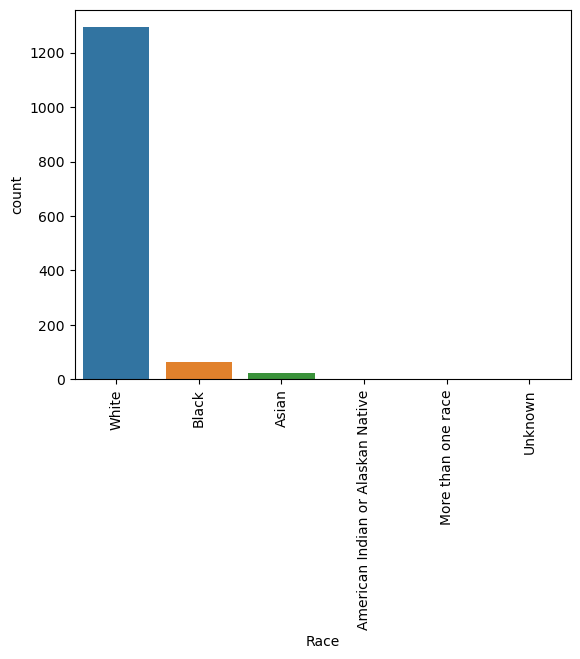

In [52]:
sns.countplot(data=final, x="Race", hue="Race", order=['White', 'Black', 'Asian', 'American Indian or Alaskan Native', 'More than one race', 'Unknown'])
plt.xticks(rotation = 90)
plt.show()

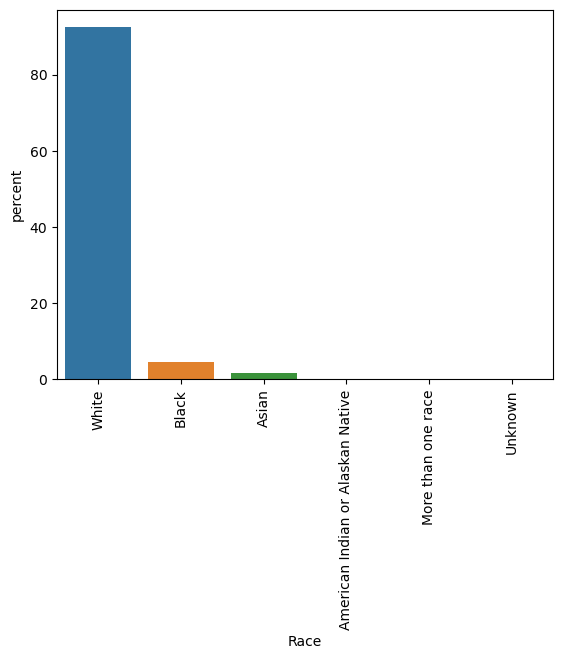

In [53]:
sns.countplot(data=final, x="Race", hue="Race", stat="percent", order=['White', 'Black', 'Asian', 'American Indian or Alaskan Native', 'More than one race', 'Unknown'])
plt.xticks(rotation = 90)
plt.show()